# Intelligent Control (ECE-DK807)

## Electrical and Computer Engineering Department, University of Patras Greece

**Instructor:** Konstantinos Chazilygeroudis (costashatz@upatras.gr)

## Lab 1

### 2D Grid World

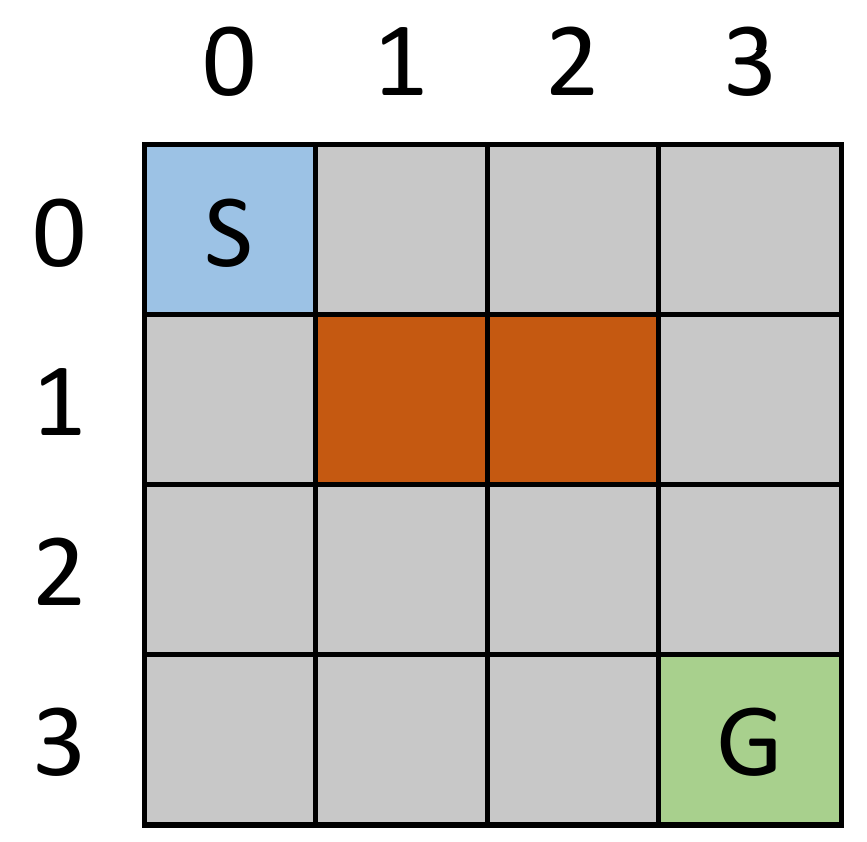

- S (blue) is the starting position
- G (green) is the goal
- Red cells are lava

At each timestep, the agent can be in only one cell. The agent has available the following actions:

1. Move Up
2. Move Down
3. Move Right
4. Move Left

If a move would make the agent go "out of bounds", then the move has no effect and the agent remains in place. The agent receives the following rewards:

- $-1$ for each step
- $-10$ for stepping on lava
- $50$ for stepping on goal

The environment "stops" when the agent reaches the goal or steps on lava.

We first need to define the *Markov Decision Process* (MDP) for this problem/world.

In [1]:
# Let's first import modules
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Plotting
import copy

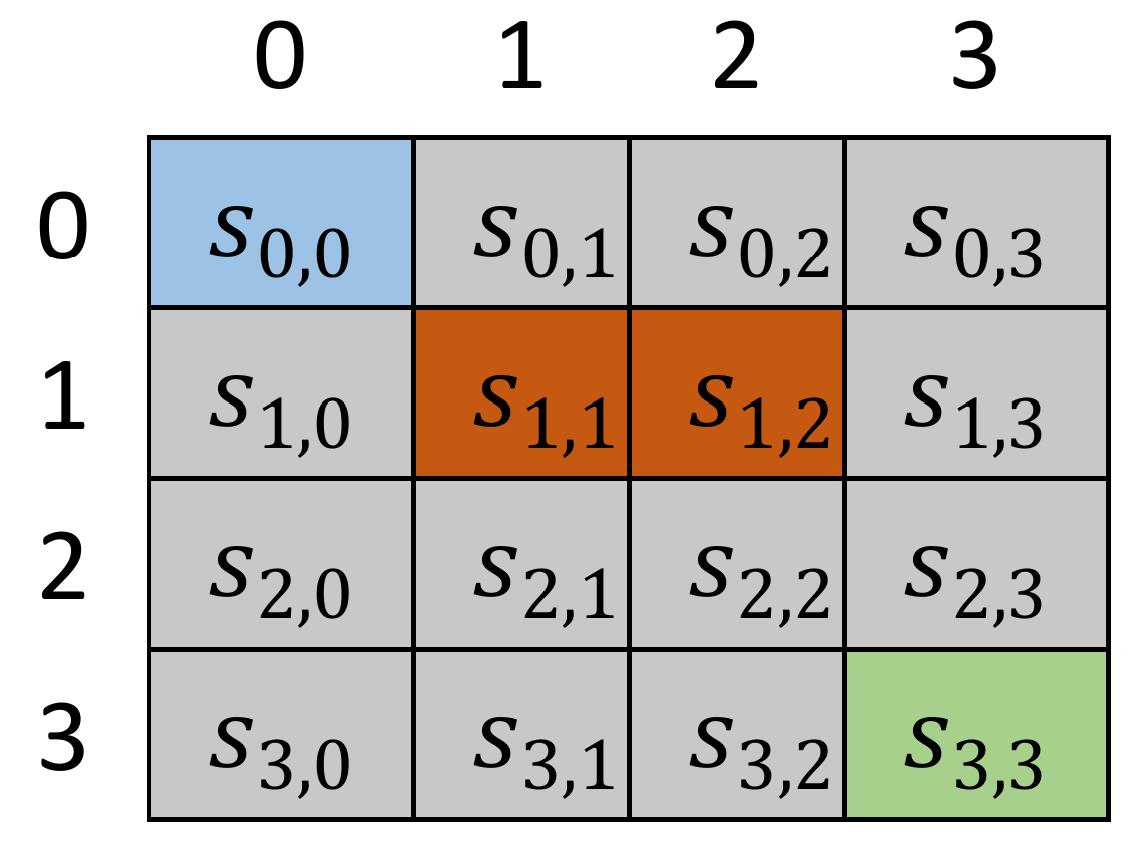

In [2]:
### TO-DO: Define the state space. We want to define each cell with a tuple (i,j), and we want to save all cells/states in a list called 'states'.
### ANSWER: Insert code here
(rows, cols) = (4, 4)
states = [(i, j) for i in range(rows) for j in range(cols)]
### END of ANSWER

# Helper function that returns true when a cell is lava
def is_lava(s):
    return (s == (1, 1) or s == (1, 2))

# Helper function that returns true when a cell is terminal
def is_terminal(s):
    return (s == (3, 3))

### TO-DO: Define the action space. This is a list of all possible actions. Save it in a variable named 'actions'.
### ANSWER: Insert code here
actions = ['Move Up', 'Move Down', 'Move Right', 'Move Left'] # Για καλύτερο readability!
### END of ANSWER

# Let's define the transition table
transition = {}
# We initial all to zeros
for s in states:
    for a in actions:
        for sp in states:
            transition[(s, a, sp)] = 0.
### TO-DO: Fill all actions
### ANSWER: Insert code here
def add_tuples(t1, t2):
    return tuple(map(sum, zip(t1, t2)));

move_offsets = {
    actions[0]: (-1, 0), # Up
    actions[1]: (+1, 0), # Down
    actions[2]: (0, +1), # Right
    actions[3]: (0, -1)  # Left
}

for s in states:
    for a in actions:
        sp = add_tuples(s, move_offsets[a])
        
        # Έλεγχος ενέργειας
        if is_terminal(s):
            sp = s
        elif is_lava(s):
            sp = s
        elif sp[0] < 0 or sp[0] >= rows or sp[1] < 0 or sp[1] >= cols: # Out of Bounds
            sp = s
        
        transition[(s, a, sp)] = 1. # Μη στοχαστικό, οπότε = 1
### END of ANSWER

# Let's define the reward table/function
reward = {}
for s in states:
    ### TO-DO: Fill with values
    ### ANSWER: Insert code here
    if is_terminal(s):
        reward[s] = +50
    elif is_lava(s):
        reward[s] = -10
    else:
        reward[s] = -1
    ### END of ANSWER

In [3]:
assert(len(states) == 16)
assert(len(actions) == 4)
assert(reward[(2, 1)] == -1.)
assert(reward[(1, 1)] == reward[(1, 2)] == -10.)
assert(reward[(3, 3)] == 50.)
assert(len(transition) == 1024)


### Iterative Policy Evaluation (IPE)

**Goal:** We want to find the *Value function* $V_{\pi}(\boldsymbol{s})$ of a *specific* policy $\pi$.

Very simple algorithm:

- Iterative application of the Bellman expectation equations
- At each iteration we get closer to the actual Value function
- At each iteration $k+1$:
  - For all states $\boldsymbol{s}\in\mathcal{S}$
  - Compute $V_{\pi}^{k+1}$ using $V_{\pi}^k$: $V_{\pi}^{k+1}(\boldsymbol{s}) = \sum_{\boldsymbol{a}\in\mathcal{A}}\pi(\boldsymbol{a}|\boldsymbol{s})\Big(R(\boldsymbol{s},\boldsymbol{a}) + \gamma\sum_{\boldsymbol{s}'\in\mathcal{S}}P(\boldsymbol{s},\boldsymbol{a},\boldsymbol{s}')V_{\pi}^k(\boldsymbol{s}')\Big)$
- We can prove that this converges to the true Value function


**Let's implement IPE for our 2D grid world and the random policy.** Let's start by creating a function for the policy:

In [4]:
# Uniform policy
policy = {}
# Let's create a uniform random policy
for s in states:
    for a in actions:
        policy[(s, a)] = 1. / float(len(actions))

Now let's create a function that computes $V_{\pi}^{k+1}$ using $V_{\pi}^k$: $V_{\pi}^{k+1}(\boldsymbol{s}) = \sum_{\boldsymbol{a}\in\mathcal{A}}\pi(\boldsymbol{a}|\boldsymbol{s})\Big(R(\boldsymbol{s},\boldsymbol{a}) + \gamma\sum_{\boldsymbol{s}'\in\mathcal{S}}P(\boldsymbol{s},\boldsymbol{a},\boldsymbol{s}')V_{\pi}^k(\boldsymbol{s}')\Big)$. In other words, performs one iteration of the IPE algorithm:

In [5]:
def ipe_iter(Vk, gamma = 0.9):
    Vkp1 = copy.copy(Vk)
    ### TO-DO: Implement iterate. Fill Vkp1 (V_{k+1}) with the correct values. Vk is a dictionary.
    for s in states:
        ### ANSWER: Insert code here
        Vkp1[s] = 0.
        for a in actions:
            EFV = 0. # Expected Future Value
            if not (is_terminal(s) or is_lava(s)): # Δηλαδή, δεν τερμάτισε ούτε έπεσε στη λάβα
                EFV = sum([transition[(s, a, sp)] * Vk[sp] for sp in states])
            
            Vkp1[s] += policy[(s, a)] * (reward[s] + gamma * EFV) 
        ### END of ANSWER
    return Vkp1

Now let's implement the whole algorithm!

In [6]:
def ipe(gamma = 0.5, max_iters = 20):
    V = {}
    ### TO-DO: Initialize the value function (V) with zeros
    ### ANSWER: Insert code here
    V = {s: 0. for s in states}
    ### END of ANSWER
    
    for i in range(max_iters):
        ### TO-DO: Implement body for iterative policy evaluation
        ### ANSWER: Insert code here
        V = ipe_iter(V, gamma)
        ### END of ANSWER
    return V

V = ipe(0.5, 20)

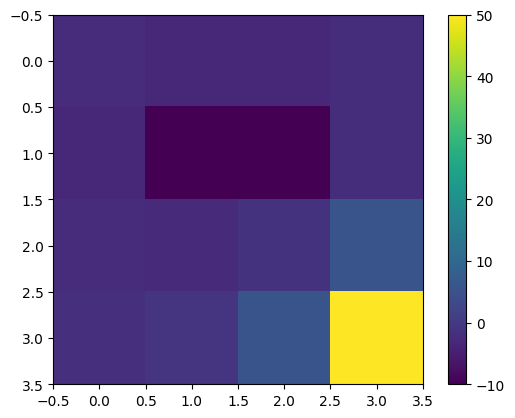

{(0, 0): -2.4413716414811613, (0, 1): -3.402842974339093, (0, 2): -3.3785295522563334, (0, 3): -2.246864202376405, (1, 0): -3.2453874445626116, (1, 1): -10.0, (1, 2): -10.0, (1, 3): -2.1026560277119195, (2, 0): -2.2763408799571985, (2, 1): -2.809531184105373, (2, 2): -1.199441486813182, (2, 3): 5.528271803483558, (3, 0): -1.8794679630979898, (3, 1): -1.0004673554127843, (3, 2): 5.68572733326004, (3, 3): 50.0}


In [7]:
# Let's plot the value function
def plot_value_function(V):
    # Visualize Value function
    _, ax = plt.subplots()
    img = np.zeros((4, 4))
    for state in states:
        img[state] = V[state]
    im = ax.imshow(img)
    ax.figure.colorbar(im, ax=ax)
    plt.show()

plot_value_function(V)

print(V)

In [8]:
assert(np.isclose(V[(0, 0)], -2.4413716414811613))
assert(np.isclose(V[(3, 2)], 5.68572733326004))
assert(np.isclose(V[(3, 3)], 50.))
assert(np.isclose(V[(1, 1)], -10.))


Now let's create a policy that always chooses the 'Move Right' Action, and re-run the iterative policy evaluation!

In [9]:
# Policy that alwas moves right!
policy = {}
### TO-DO: Create a policy that always moves right
### ANSWER: Insert code here
policy_right = {
    actions[0]: 0., # Up
    actions[1]: 0., # Down
    actions[2]: 1., # Right
    actions[3]: 0.  # Left
}

for s in states:
    for a in actions:
        policy[(s, a)] = policy_right[a]
### END of ANSWER

In [10]:
# Re-run Iterative Policy Evaluation
V = ipe(0.5, 20)

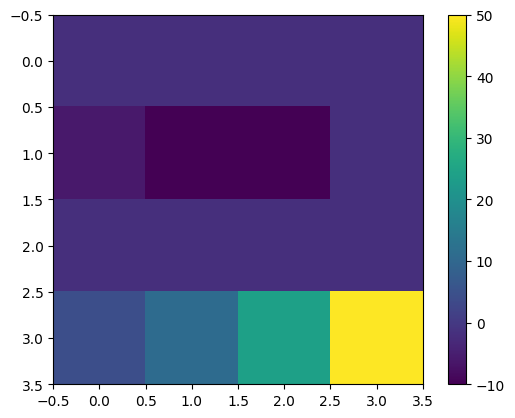

{(0, 0): -1.9999980926513672, (0, 1): -1.9999980926513672, (0, 2): -1.9999980926513672, (0, 3): -1.9999980926513672, (1, 0): -6.0, (1, 1): -10.0, (1, 2): -10.0, (1, 3): -1.9999980926513672, (2, 0): -1.9999980926513672, (2, 1): -1.9999980926513672, (2, 2): -1.9999980926513672, (2, 3): -1.9999980926513672, (3, 0): 4.5, (3, 1): 11.0, (3, 2): 24.0, (3, 3): 50.0}


In [11]:
plot_value_function(V)

print(V)

In [12]:
assert(np.isclose(V[(0, 0)], -1.9999980926513672))
assert(np.isclose(V[(3, 2)], 24.))
assert(np.isclose(V[(3, 3)], 50.))
assert(np.isclose(V[(1, 1)], -10.))


### Policy Iteration

**Goal:** Find the *optimal* policy

- We start from an initial policy $\pi_0$
- Policy Evaluation to compute $V_{\pi}^{k+1}(\boldsymbol{s})$
- (Greedy) Policy Improvement: $\pi_{k+1}=\max_{\pi}V_{\pi}^{k+1}(\boldsymbol{s})$
- As we increase the iterations, we get more accurate results
- We can prove that it converges to the optimal policy

Let's implement it for our world!

{((0, 0), 'Move Up'): 0.0, ((0, 0), 'Move Down'): 0.5, ((0, 0), 'Move Right'): 0.5, ((0, 0), 'Move Left'): 0.0, ((0, 1), 'Move Up'): 0.0, ((0, 1), 'Move Down'): 0.0, ((0, 1), 'Move Right'): 1.0, ((0, 1), 'Move Left'): 0.0, ((0, 2), 'Move Up'): 0.0, ((0, 2), 'Move Down'): 0.0, ((0, 2), 'Move Right'): 1.0, ((0, 2), 'Move Left'): 0.0, ((0, 3), 'Move Up'): 0.0, ((0, 3), 'Move Down'): 1.0, ((0, 3), 'Move Right'): 0.0, ((0, 3), 'Move Left'): 0.0, ((1, 0), 'Move Up'): 0.0, ((1, 0), 'Move Down'): 1.0, ((1, 0), 'Move Right'): 0.0, ((1, 0), 'Move Left'): 0.0, ((1, 1), 'Move Up'): 0.25, ((1, 1), 'Move Down'): 0.25, ((1, 1), 'Move Right'): 0.25, ((1, 1), 'Move Left'): 0.25, ((1, 2), 'Move Up'): 0.25, ((1, 2), 'Move Down'): 0.25, ((1, 2), 'Move Right'): 0.25, ((1, 2), 'Move Left'): 0.25, ((1, 3), 'Move Up'): 0.0, ((1, 3), 'Move Down'): 1.0, ((1, 3), 'Move Right'): 0.0, ((1, 3), 'Move Left'): 0.0, ((2, 0), 'Move Up'): 0.0, ((2, 0), 'Move Down'): 0.5, ((2, 0), 'Move Right'): 0.5, ((2, 0), 'Move Left'

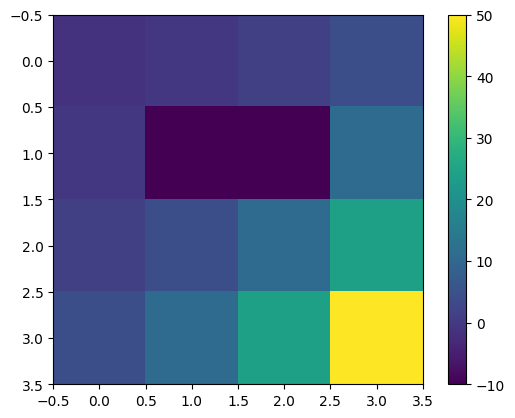

{(0, 0): -1.1875, (0, 1): -0.375, (0, 2): 1.25, (0, 3): 4.5, (1, 0): -0.375, (1, 1): -10.0, (1, 2): -10.0, (1, 3): 11.0, (2, 0): 1.25, (2, 1): 4.5, (2, 2): 11.0, (2, 3): 24.0, (3, 0): 4.5, (3, 1): 11.0, (3, 2): 24.0, (3, 3): 50.0}


In [13]:
V = {}
### TO-DO: Initialize the value function (V) with zeros. Just copy from above
### ANSWER: Insert code here
V = {s: 0. for s in states}
### END of ANSWER

# Let's create an initial policy (uniform random)
policy = {}
for s in states:
    for a in actions:
        policy[(s, a)] = 1. / float(len(actions)) # uniform

# Policy Iteration
gamma = 0.5
max_iters = 20
for i in range(max_iters):
    # At each iteration, we first perform Iterative Policy Evaluation
    V = ipe(gamma)
    # We, then, perform the Greedy Policy Improvement
    ### TO-DO: Implement greedy policy improvement. In other words, we need to update the "policy" given the Value function (V)
    ### ANSWER: Insert code here
    for s in states:
        temp_actions = {a: 0. for a in actions}
        for a in actions:
            EFV = 0. # Expected Future Value
            if not (is_terminal(s) or is_lava(s)):
                EFV = sum([transition[(s, a, sp)] * V[sp] for sp in states])
            temp_actions[a] += reward[s] + gamma * EFV

        max_q = max(temp_actions.values())
        best_actions = [a for a, q in temp_actions.items() if q == max_q]
        for a in actions:
            policy[(s, a)] = 1. / len(best_actions) if a in best_actions else 0.
    ### END of ANSWER

print(policy)
plot_value_function(V)
print(V)

In [14]:
assert(V[(0, 0)] == -1.1875)
assert(V[(0, 1)] == -0.375)
assert(V[(3, 3)] == 50.)
assert(V[(3, 2)] == 24.)
assert(V[(3, 1)] == 11.)

for a in actions:
    assert(policy[((3, 3), a)] == 0.25)
assert(policy[((3, 2), 'Move Right')] == 1.)


### Value Iteration

**Goal:** Find the *optimal* policy

- Iterative application of the *Bellman Equations*
- At each iteration $k+1$:
  - For all states $\boldsymbol{s}\in\mathcal{S}$
  - Compute $V_*^{k+1}$ using $V_*^k$: $V_*^{k+1}(\boldsymbol{s}) = \max_{\boldsymbol{a}}\Big(R(\boldsymbol{s},\boldsymbol{a}) + \gamma\sum_{\boldsymbol{s}'\in\mathcal{S}}P(\boldsymbol{s},\boldsymbol{a},\boldsymbol{s}')V_*^k(\boldsymbol{s}')\Big)$
- We can prove that this converges to the optimal Value function

Let's implement it for our world!

{((0, 0), 'Move Up'): 0.0, ((0, 0), 'Move Down'): 0.5, ((0, 0), 'Move Right'): 0.5, ((0, 0), 'Move Left'): 0.0, ((0, 1), 'Move Up'): 0.0, ((0, 1), 'Move Down'): 0.0, ((0, 1), 'Move Right'): 1.0, ((0, 1), 'Move Left'): 0.0, ((0, 2), 'Move Up'): 0.0, ((0, 2), 'Move Down'): 0.0, ((0, 2), 'Move Right'): 1.0, ((0, 2), 'Move Left'): 0.0, ((0, 3), 'Move Up'): 0.0, ((0, 3), 'Move Down'): 1.0, ((0, 3), 'Move Right'): 0.0, ((0, 3), 'Move Left'): 0.0, ((1, 0), 'Move Up'): 0.0, ((1, 0), 'Move Down'): 1.0, ((1, 0), 'Move Right'): 0.0, ((1, 0), 'Move Left'): 0.0, ((1, 1), 'Move Up'): 0.25, ((1, 1), 'Move Down'): 0.25, ((1, 1), 'Move Right'): 0.25, ((1, 1), 'Move Left'): 0.25, ((1, 2), 'Move Up'): 0.25, ((1, 2), 'Move Down'): 0.25, ((1, 2), 'Move Right'): 0.25, ((1, 2), 'Move Left'): 0.25, ((1, 3), 'Move Up'): 0.0, ((1, 3), 'Move Down'): 1.0, ((1, 3), 'Move Right'): 0.0, ((1, 3), 'Move Left'): 0.0, ((2, 0), 'Move Up'): 0.0, ((2, 0), 'Move Down'): 0.5, ((2, 0), 'Move Right'): 0.5, ((2, 0), 'Move Left'

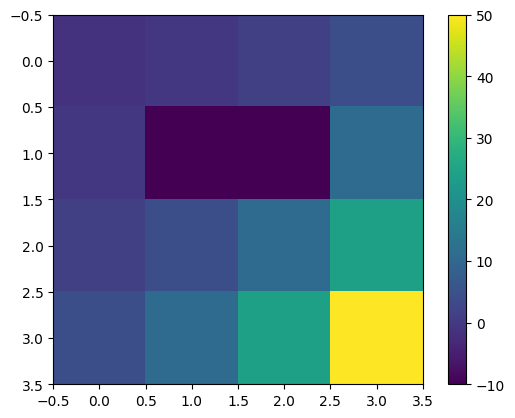

{(0, 0): -1.1875, (0, 1): -0.375, (0, 2): 1.25, (0, 3): 4.5, (1, 0): -0.375, (1, 1): -10.0, (1, 2): -10.0, (1, 3): 11.0, (2, 0): 1.25, (2, 1): 4.5, (2, 2): 11.0, (2, 3): 24.0, (3, 0): 4.5, (3, 1): 11.0, (3, 2): 24.0, (3, 3): 50.0}


In [15]:
V = {}
### TO-DO: Initialize the value function (V) with zeros. Just copy from above
### ANSWER: Insert code here
V = {s: 0. for s in states}
### END of ANSWER

# Let's create an initial policy (uniform random)
policy = {}
for s in states:
    for a in actions:
        policy[(s, a)] = 1. / float(len(actions)) # uniform

gamma = 0.5
max_iters = 20
for i in range(max_iters):
    Vkp1 = copy.copy(V)
    for s in states:
        ### TO-DO: Implement iterate of Value Iteration. Compute Vkp1 (V_{k+1}) using the above equation.
        ### ANSWER: Insert code here
        Vkp1[s] = float('-inf')
        for a in actions:
            EFV = 0. # Expected Future Value
            if not (is_terminal(s) or is_lava(s)):
                EFV = sum([transition[(s, a, sp)] * V[sp] for sp in states])
            Vkp1[s] = max(Vkp1[s], reward[s] + gamma * EFV)
        '''
        # Η αρχική ιδέα ήταν να αποθηκεύει πρώτα όλες τις τιμές και μετά να βρίσκει το max,
        # αλλά ήθελα να το βρίσκει δυναμικά μέσα στο loop: for a in actions!
        V_star_temp = {a: 0. for a in actions}
        for a in actions:
            EFV = 0. # Expected Future Value
            if not (is_terminal(s) or is_lava(s)):
                EFV = sum([transition[(s, a, sp)] * V[sp] for sp in states])
            V_star_temp[a] = reward[s] + gamma * EFV

        Vkp1[s] = max(V_star_temp.values())
        '''
        ### END of ANSWER
    V = copy.copy(Vkp1)

# In order to compute the final policy, we do Greedy Policy Improvement.

### TO-DO: Implement greedy policy improvement (copy from before)
### ANSWER: Insert code here
policy = {}
gamma = 0.5
max_iters = 20
for i in range(max_iters):
    for s in states:
        temp_actions = {a: 0. for a in actions}
        for a in actions:
            EFV = 0. # Expected Future Value
            if not (is_terminal(s) or is_lava(s)):
                EFV = sum([transition[(s, a, sp)] * V[sp] for sp in states])
            temp_actions[a] += reward[s] + gamma * EFV

        max_q = max(temp_actions.values())
        best_actions = [a for a, q in temp_actions.items() if q == max_q]
        for a in actions:
            policy[(s, a)] = 1. / len(best_actions) if a in best_actions else 0.
### END of ANSWER

print(policy)
plot_value_function(V)
print(V)

In [16]:
assert(V[(0, 0)] == -1.1875)
assert(V[(0, 1)] == -0.375)
assert(V[(3, 3)] == 50.)
assert(V[(3, 2)] == 24.)
assert(V[(3, 1)] == 11.)

for a in actions:
    assert(policy[((3, 3), a)] == 0.25)
assert(policy[((3, 2), 'Move Right')] == 1.)
